In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [10]:
dataset = pd.read_csv("Dataset/SOM/Credit_Card_Applications.csv")

In [11]:
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

### SOM

In [13]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

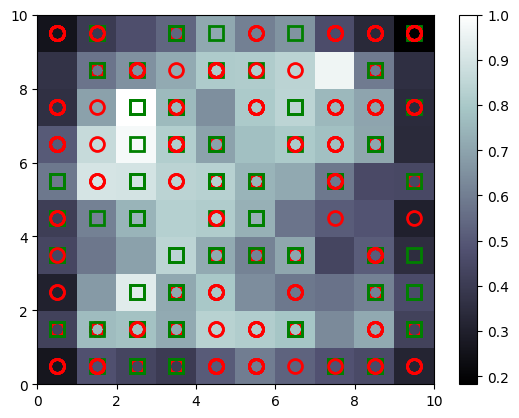

In [14]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [15]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)


In [16]:
"""##Printing the Fraunch Clients"""

print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15704581
15725776
15697460
15737998
15586183
15718921
15607988
15683993
15797767
15744044
15632010
15804235
15627365
15573798
15700300
15791944
15576680
15620570
15592412
15767264
15770995


In [17]:
customers = dataset.iloc[:, 1:].values
is_fraud = np.zeros(len(dataset))

for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i]=1

### ANN

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)


In [21]:
# Initializing the ANN
ann = tf.keras.models.Sequential()
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=2, activation='relu',input_dim=15))
# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [22]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Training the ANN on the Training set
ann.fit(customers, is_fraud, batch_size = 1, epochs = 2)


Epoch 1/2


690/690 [==============================] - 1s 690us/step - loss: 0.5957 - accuracy: 0.8058
Epoch 2/2
690/690 [==============================] - 0s 650us/step - loss: 0.3605 - accuracy: 0.9304


In [23]:
y_pred = ann.predict(customers)

22/22 [==============================] - 0s 715us/step


In [27]:
fraud_possibilities = np.concatenate((dataset.iloc[:,0:1],y_pred),axis=1)

In [29]:
fraud_possibilities = fraud_possibilities[fraud_possibilities[:,1].argsort()]

In [30]:
fraud_possibilities

array([[1.56531470e+07, 7.93984858e-04],
       [1.57882150e+07, 9.86540108e-04],
       [1.56098230e+07, 1.19478581e-03],
       ...,
       [1.58137180e+07, 6.12719476e-01],
       [1.56679340e+07, 6.54366732e-01],
       [1.55941330e+07, 6.86304569e-01]])